# Recap 

Thesis objective is to build ML machine to predict longterm heatwaves indices. 

We first tried to reproduce ENSO Indices with raw data, bcs literature notes the importance of this phenomenon in season's temperatures (niña hot, niño cold)

After succeding in reproducing Indices, we explore the linear correlation between MEI and HW's, next the personal-specified variants of MEI (MEI in whole world, specific boxes, using more than first mode, using different variables). Everything points that there is an underlying pattern because some combinations between the parameters showed high absolute correlations for some seasons. 

Next step was to build ML Pipeline:

1- Build *a lot* of different features \
2- Feature select N_bests using pearson and spearman correlations \
3- Predict using different types from regressors (Linear, RF, XGB, GPR) across 50 years of data (1972-2022 using 5 years as test set) \
4- Measure the prediction potential using r2, mape, cross-validation (5-folds) (idk why 5-folds, should have used 10-folds to match 5 years as test set)

Notas Elier:

- Usar relacion cruzada para analisar el desfase de indices vs hws


# Poster

## Introduction

- Objective of thesis: Build predictors for an hybdrid model (dynamical and statistic) capable of long-term forecasting indices of heatwaves for Central Chile and California.
- Introduce heatwaves definition. We work with Meteochile's definition and a heatwave is an event when the maximum daily temperature exceeds the climatological threshold from three consecutive days. For long-term forecasting we work with heatwaves indices, we work with 5 different indices of frequency and intensity. 
- Introduce MEI and why it's good to detect ENSO.

## Methodology of Predictors
- MultivariatePCA is useful for dimensionality reduction for constructing features for ML, we have to use any technique of reduction because we are in a regime lack of data (overfitting is easy).
- So we construct a lot of different Multivariate principal components, getting from the first to the third mode, randomizing the variables (sea surface temperature, surface pressure, winds, outgoing longwave radiation and geopotential height) used and the region boxes (24 different boxes) around the pacific ocean (120E, 70W, 60S, 60N).
- After building, we use linear correlation as feature selection to get the best 20 predictors independetly by biseason.


## Methodology of ML
- For the ML part, we tested every feature dataset built for each biseason with different regression models including RandomForest, XGBoost, Support Vector Machine Regressor, GaussianProcess Regressor, along with different set of hyperparameters.
- Initially we finetune the models using 45 years of training (1972-2016) and 5 years of validation (2017-2022). This is done indepdentely by each of the twelve biseasons.
- Then we use a random 10-folds cross validation to secure the model capabilities of prediction.

## Results
- First we effectively reproduced the MEIv2 Index, correlating 0.96 with the one published by NOAA.
- We managed to identify the most important boxes for those models with good CV results: [155W,107.5W,30N,60N] and [107.5W,60W,30N,60N] for California; [155W,107.5W,30S,0], [107.5W,60W,30S,0S] and
[107.5W,60W,60S,30S] for Chile.
- For California, Best model (CV) is RandomForest with 10 estimators using data id22250158 for label HWN in biseason December-January
- For Chile, Best model (CV) is RandomForest with 10 estimators using data idf7fe5651 for label HWF in biseason June-July

## Conclusions and forward Work
- As literature notes, season forecast is the best accurate approach because of season pattern variability. This study uses that using biseasons and works in some occasions, a forward work would be try this for different seasons length.
- The box election for the boxes is very important. The climate is a chaotic system that transport mass and energy through the entire world. This approach shows more relevance towards the closest boxes to the heatwaves regions. But shows also some boxes very far from the location study (more than 70 degrees in longitude).
- We've only tested the models using traditionally (random) cross validation using 10-folds. A more insighted approach would be consider the autocorrelation between the timeseries and use a specific timeseries cross validation, where each fold test is always after chronologically than the training folds. 


In [1]:
import os
import sys

C:\Users\marti\AppData\Local\Temp\ipykernel_25588\2096699513.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='CV-R2', data=data, palette='coolwarm', width=0.4)


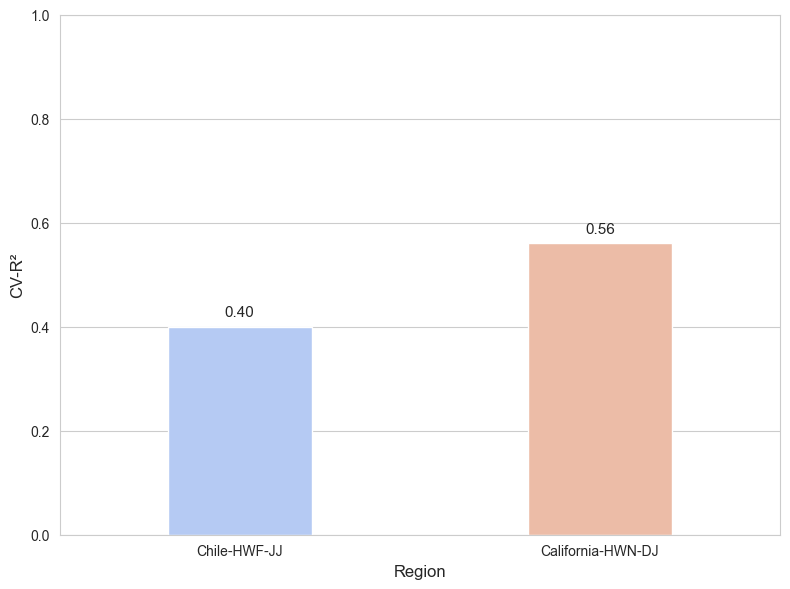

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe with results
data = pd.DataFrame({
    'Region': ['Chile-HWF-JJ', 'California-HWN-DJ'],
    'CV-R2': [0.4, 0.56]
})

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create barplot with narrower bars
ax = sns.barplot(x='Region', y='CV-R2', data=data, palette='coolwarm', width=0.4)

# Customize plot
#plt.title('Cross-Validation R² by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('CV-R²', fontsize=12)
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add text annotations on top of bars
for i, value in enumerate(data['CV-R2']):
    ax.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=11)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()